In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
str_results = pd.read_csv("../04_structural_models/structural_model_results.csv")
#img_results = pd.read_csv("../05_cellpainting_models/cellpainting_model_results.csv")

#remove this line when Cell Painting results available
img_results = str_results

In [3]:
# Rename columns with 'atr_' and 'img_'
str_results = str_results.rename(columns=lambda x: 'str_' + x if x != str_results.columns[0] else x)
img_results = img_results.rename(columns=lambda x: 'img_' + x if x != img_results.columns[0] else x)

In [4]:
def replace_numeric_with_similar(value):
    if pd.notna(value) and isinstance(value, (int, float)):
        return value + np.random.uniform(-0.1, 0.1)  # Adjust the range as needed
    else:
        return value

# Apply the function to all elements in the DataFrame
img_results = img_results.applymap(replace_numeric_with_similar)

In [5]:
# Merge the DataFrames on the first column (assuming it's a common identifier)
results_df = pd.merge(str_results, img_results, on="endpoint", suffixes=('_atr', '_img'))
results_df

,endpoint,str_CV_AUC_mean,str_CV_AUC_std,str_Held_out_TP,str_Held_out_TN,str_Held_out_FP,str_Held_out_FN,str_Held_out_BA,str_Held_out_AUC,str_Held_out_MCC,...,img_Held_out_Specificity,img_Held_out_Sensitivity,img_CV_R2_mean,img_CV_R2_std,img_Held_out_R2,img_Held_out_RMSE,img_Held_out_median_fold_error,img_Held_out_perc_2_fold,img_Held_out_perc_3_fold,img_Held_out_perc_5_fold
0,BSK_3C_VCAM1_down,0.699709,0.043135,6.0,50.0,6.0,9.0,0.646429,0.660714,0.318991,...,0.967989,0.494300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,TOX21_p53_BLA_p5_viability,0.743498,0.070915,6.0,456.0,14.0,17.0,0.615541,0.704533,0.247021,...,1.016111,0.205726,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,APR_HepG2_MicrotubuleCSK_24h_up,0.597933,0.144702,1.0,50.0,3.0,4.0,0.571698,0.811321,0.158830,...,0.894583,0.164382,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BSK_CASM3C_MCSF_down,0.688836,0.106173,6.0,48.0,11.0,6.0,0.656780,0.665254,0.275369,...,0.753175,0.427084,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BSK_CASM3C_TissueFactor_down,0.653295,0.114399,1.0,59.0,2.0,9.0,0.533607,0.654098,0.116226,...,0.928581,0.135964,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373,terminal_t1_per_2_h,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.072656,-0.054313,0.121712,0.508237,2.377026,37.861592,63.217435,82.781579
374,human_CL_mL_per_min_per_kg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.069087,0.087437,0.284837,0.670150,2.195868,44.734011,67.430988,83.194425
375,human_VDss_L_per_kg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.397743,-0.048985,0.479259,0.485172,2.264913,41.263364,64.014757,82.126646
376,fraction_unbound_in_plasma_fu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.291334,0.024302,0.389845,0.223376,2.279046,41.424099,60.899017,71.334854


In [6]:
import pickle

pickle_file_path = '../02_Explore_JUMP_compounds/activity_columns_mapping_selected.pkl'

# Loading the dictionary
with open(pickle_file_path, 'rb') as file:
    activity_columns_mapping = pickle.load(file)

In [7]:
def map_to_group(endpoint):
    for group, endpoints in activity_columns_mapping.items():
        if endpoint in endpoints:
            return group
    return 'Other'  # A default group if not found in the mapping

# Add a new column 'Mapping_Group' based on 'Endpoint'
results_df['Task'] = results_df['endpoint'].apply(lambda x: map_to_group(x))
results_df

,endpoint,str_CV_AUC_mean,str_CV_AUC_std,str_Held_out_TP,str_Held_out_TN,str_Held_out_FP,str_Held_out_FN,str_Held_out_BA,str_Held_out_AUC,str_Held_out_MCC,...,img_Held_out_Sensitivity,img_CV_R2_mean,img_CV_R2_std,img_Held_out_R2,img_Held_out_RMSE,img_Held_out_median_fold_error,img_Held_out_perc_2_fold,img_Held_out_perc_3_fold,img_Held_out_perc_5_fold,Task
0,BSK_3C_VCAM1_down,0.699709,0.043135,6.0,50.0,6.0,9.0,0.646429,0.660714,0.318991,...,0.494300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,toxcast
1,TOX21_p53_BLA_p5_viability,0.743498,0.070915,6.0,456.0,14.0,17.0,0.615541,0.704533,0.247021,...,0.205726,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,toxcast
2,APR_HepG2_MicrotubuleCSK_24h_up,0.597933,0.144702,1.0,50.0,3.0,4.0,0.571698,0.811321,0.158830,...,0.164382,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,toxcast
3,BSK_CASM3C_MCSF_down,0.688836,0.106173,6.0,48.0,11.0,6.0,0.656780,0.665254,0.275369,...,0.427084,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,toxcast
4,BSK_CASM3C_TissueFactor_down,0.653295,0.114399,1.0,59.0,2.0,9.0,0.533607,0.654098,0.116226,...,0.135964,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,toxcast
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373,terminal_t1_per_2_h,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.072656,-0.054313,0.121712,0.508237,2.377026,37.861592,63.217435,82.781579,PK_Lombardo
374,human_CL_mL_per_min_per_kg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.069087,0.087437,0.284837,0.670150,2.195868,44.734011,67.430988,83.194425,PK_Lombardo
375,human_VDss_L_per_kg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.397743,-0.048985,0.479259,0.485172,2.264913,41.263364,64.014757,82.126646,PK_Lombardo
376,fraction_unbound_in_plasma_fu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.291334,0.024302,0.389845,0.223376,2.279046,41.424099,60.899017,71.334854,PK_Lombardo


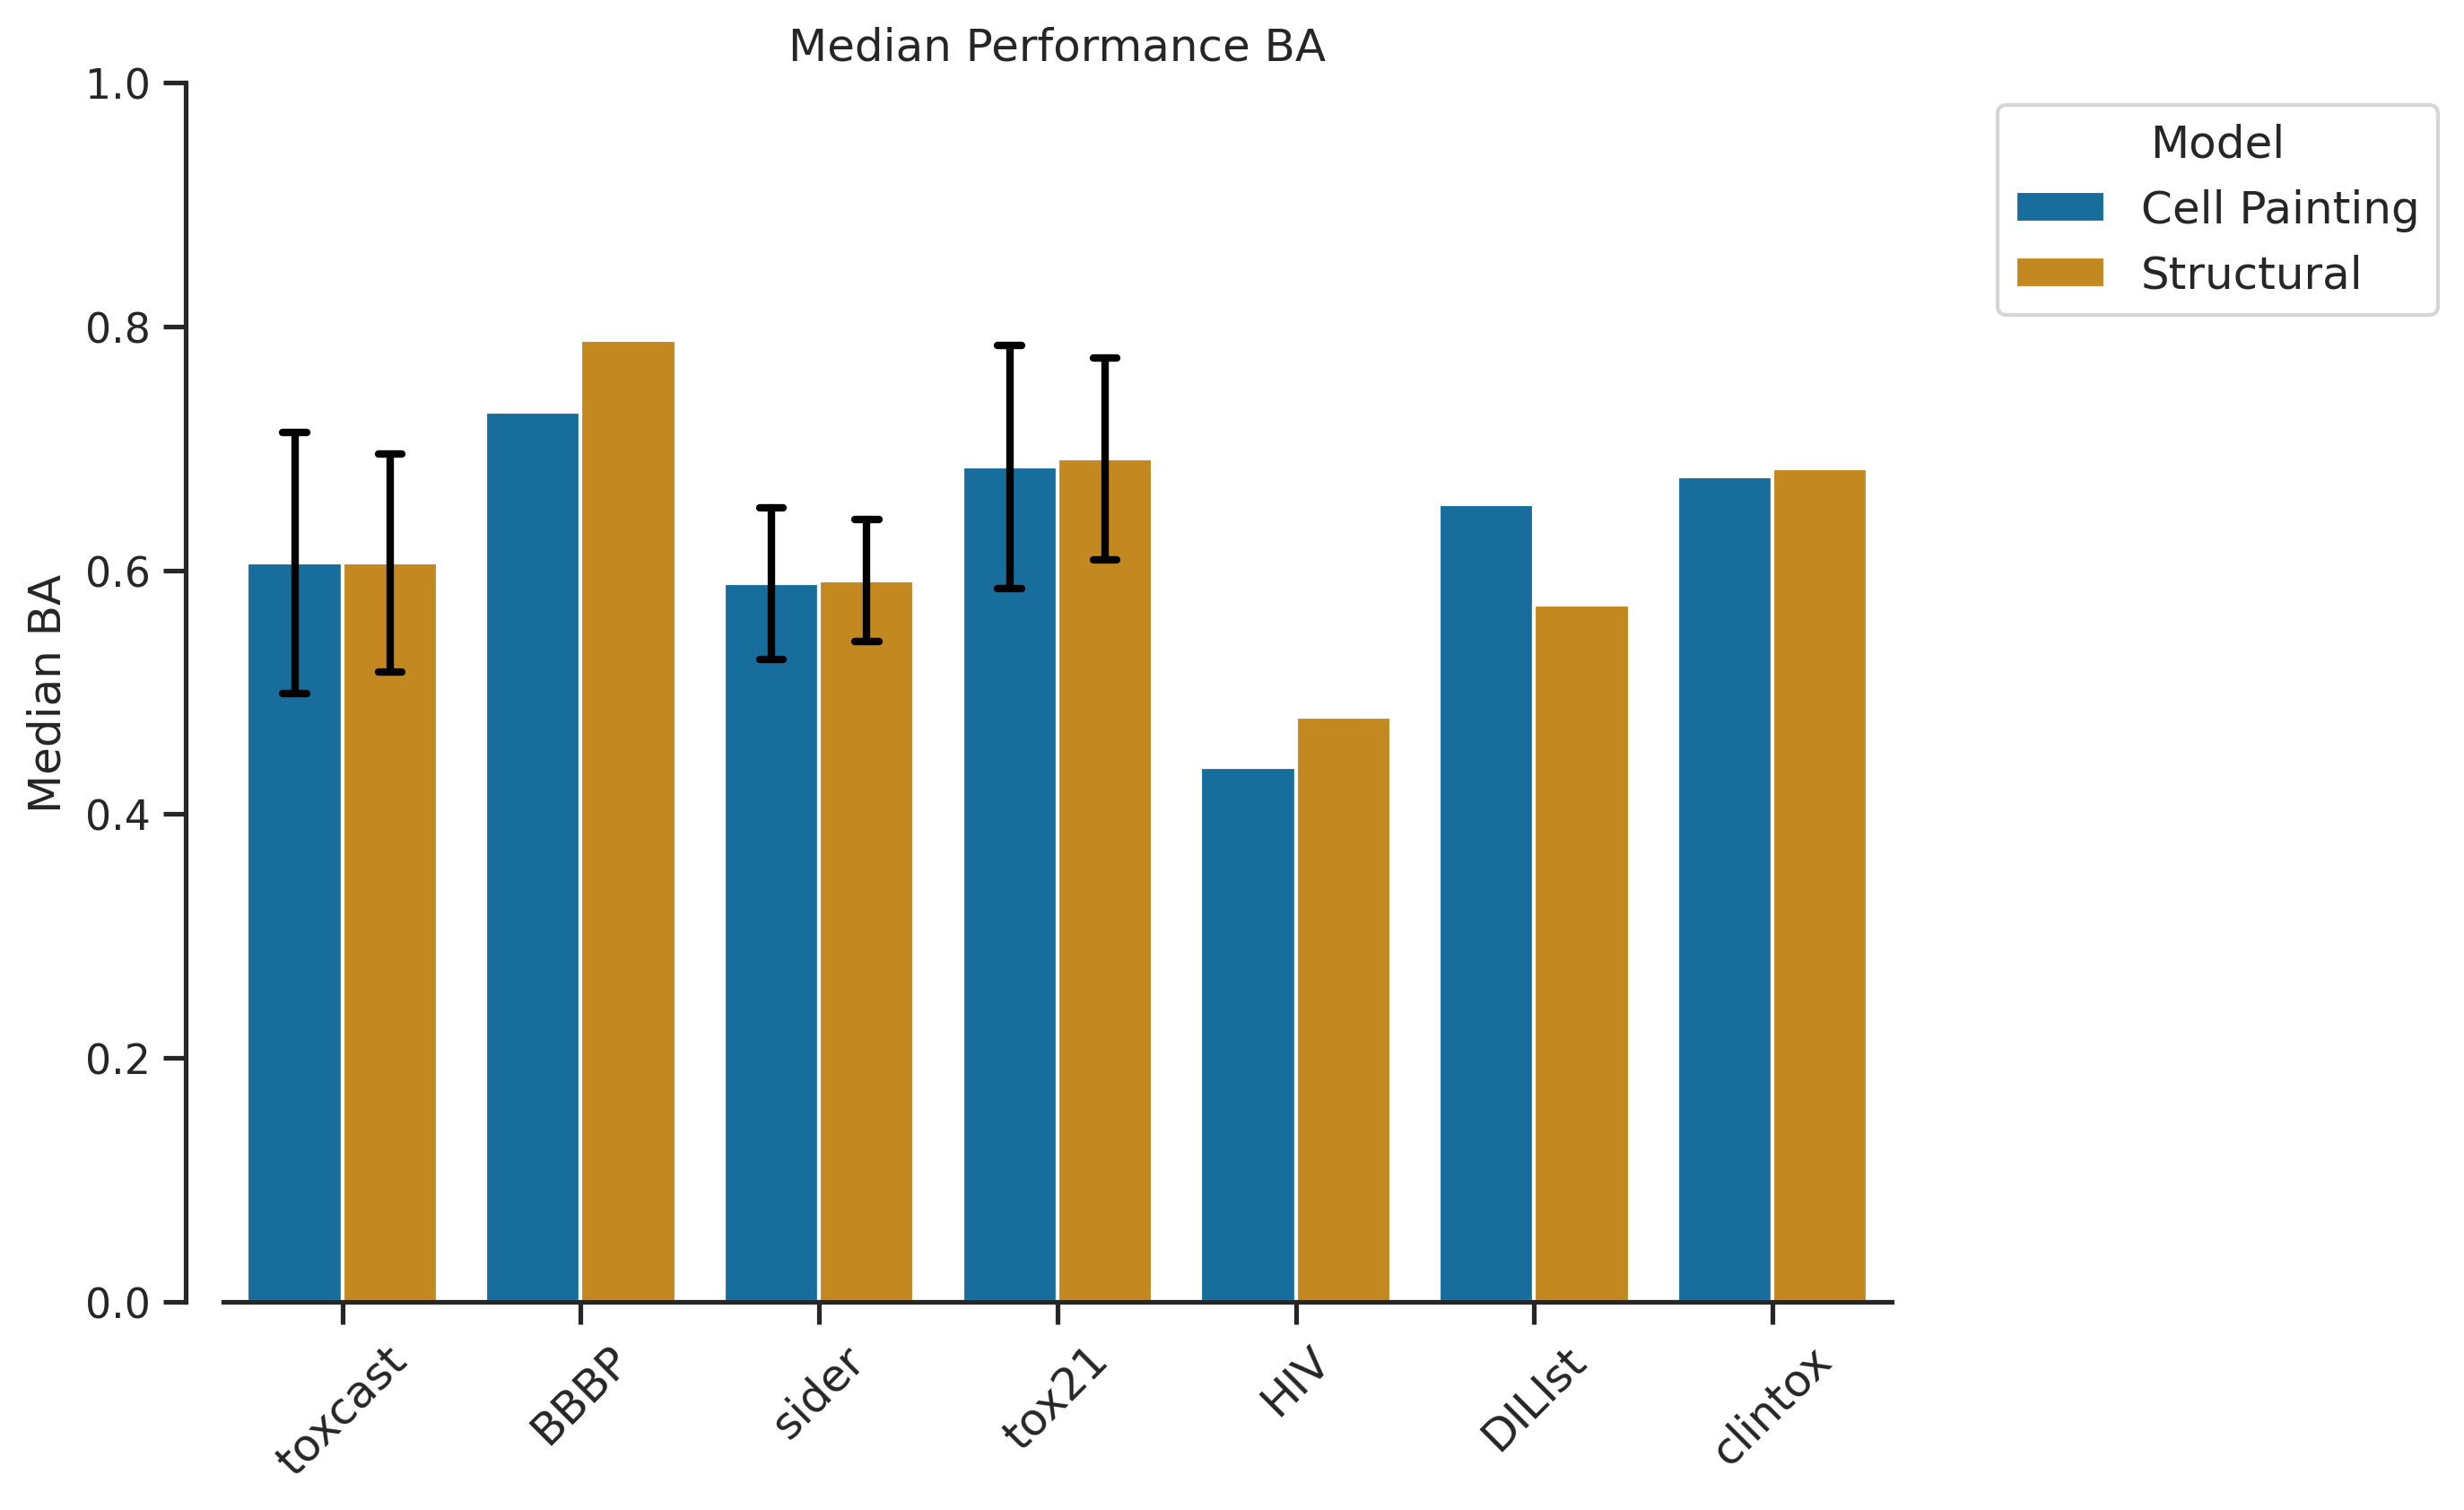

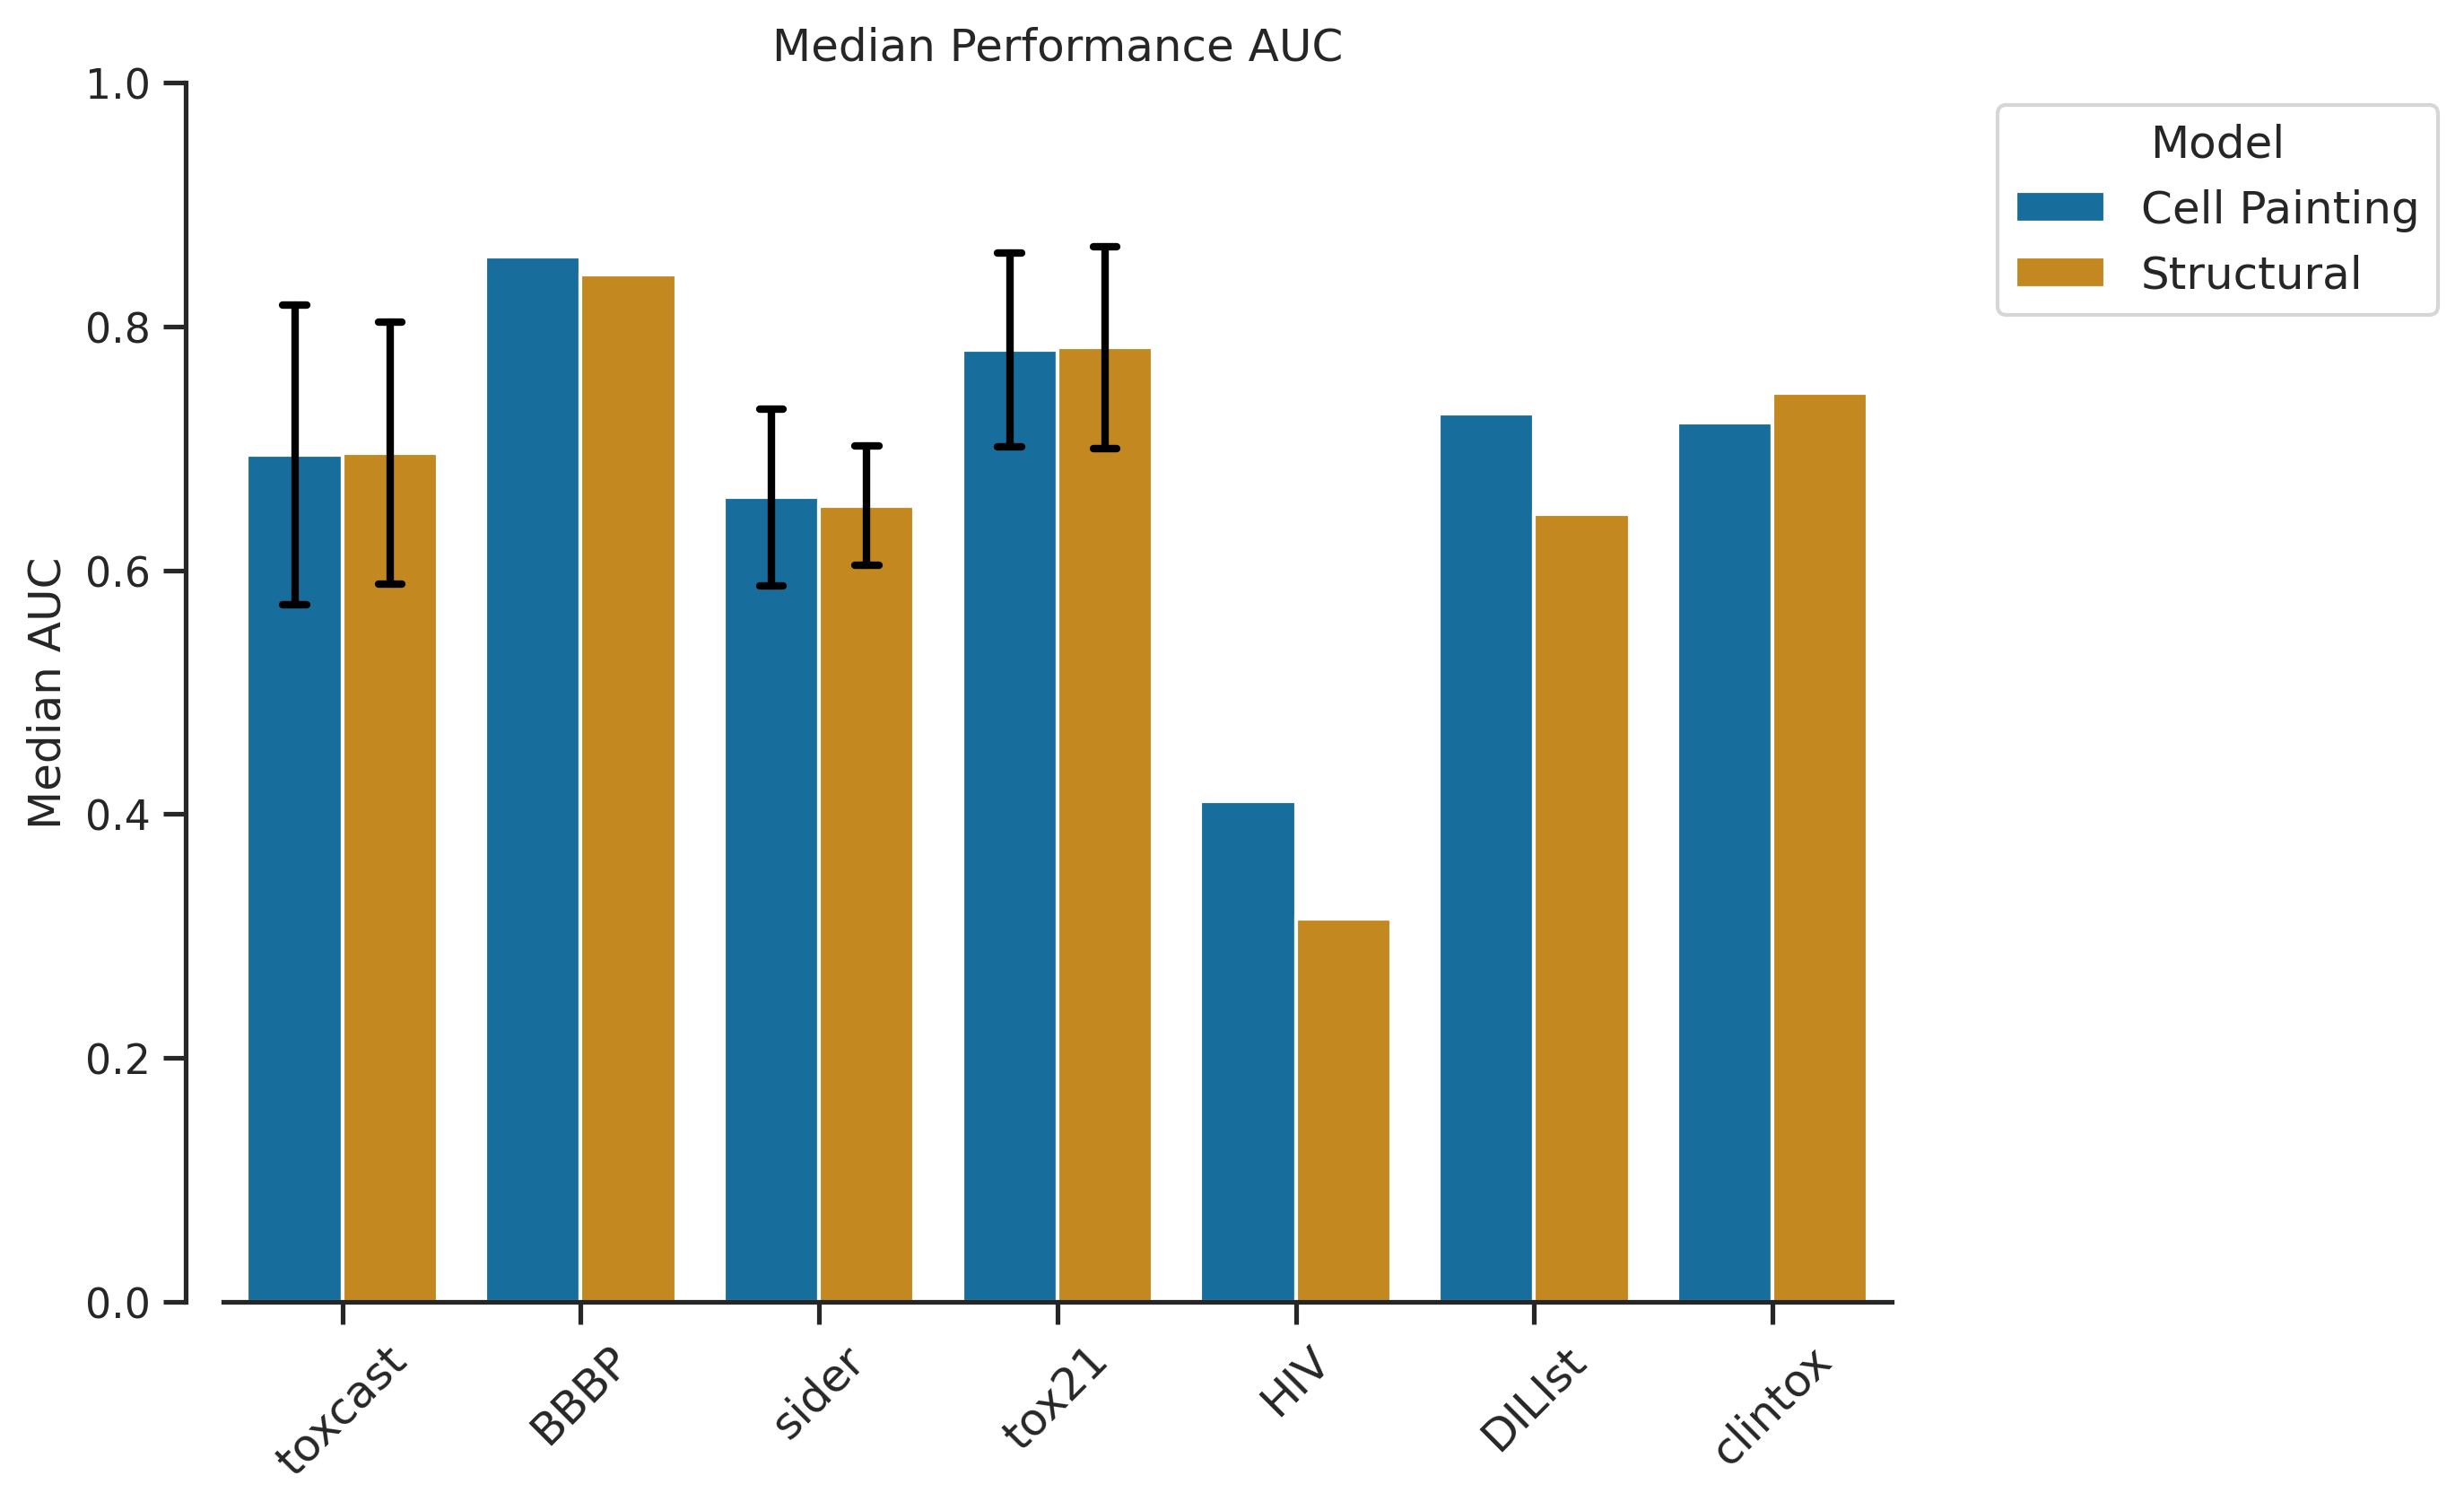

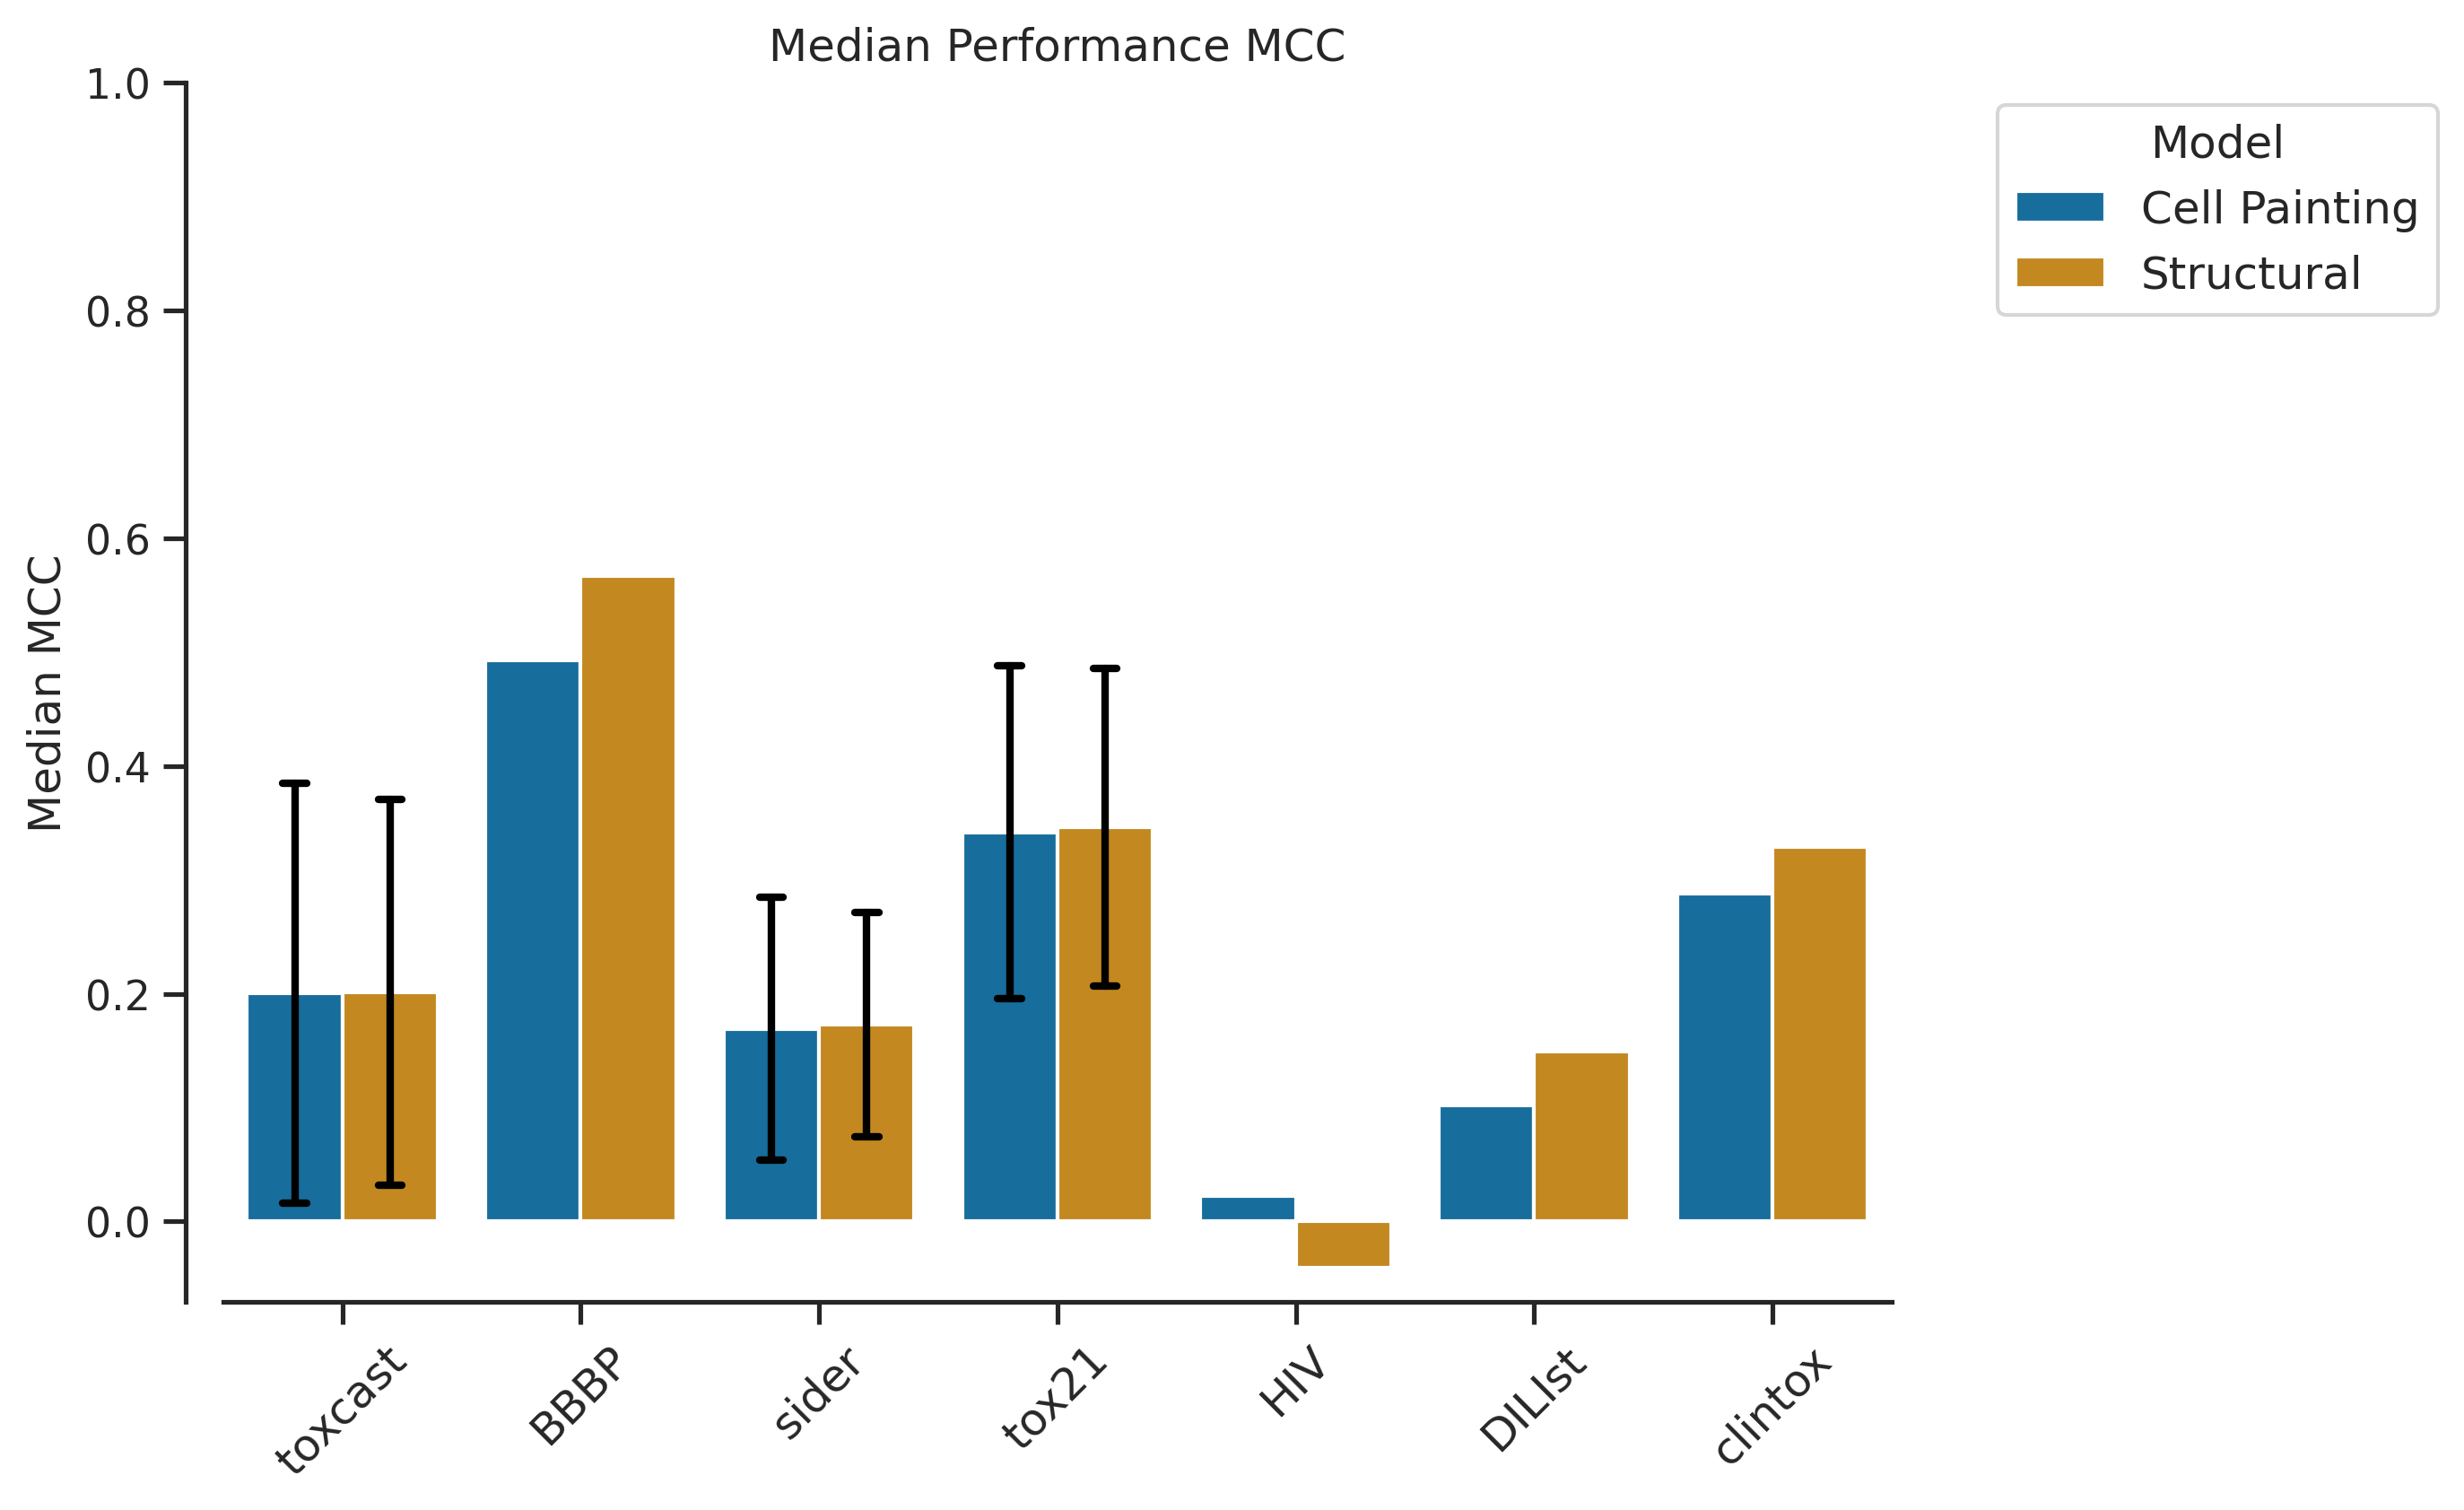

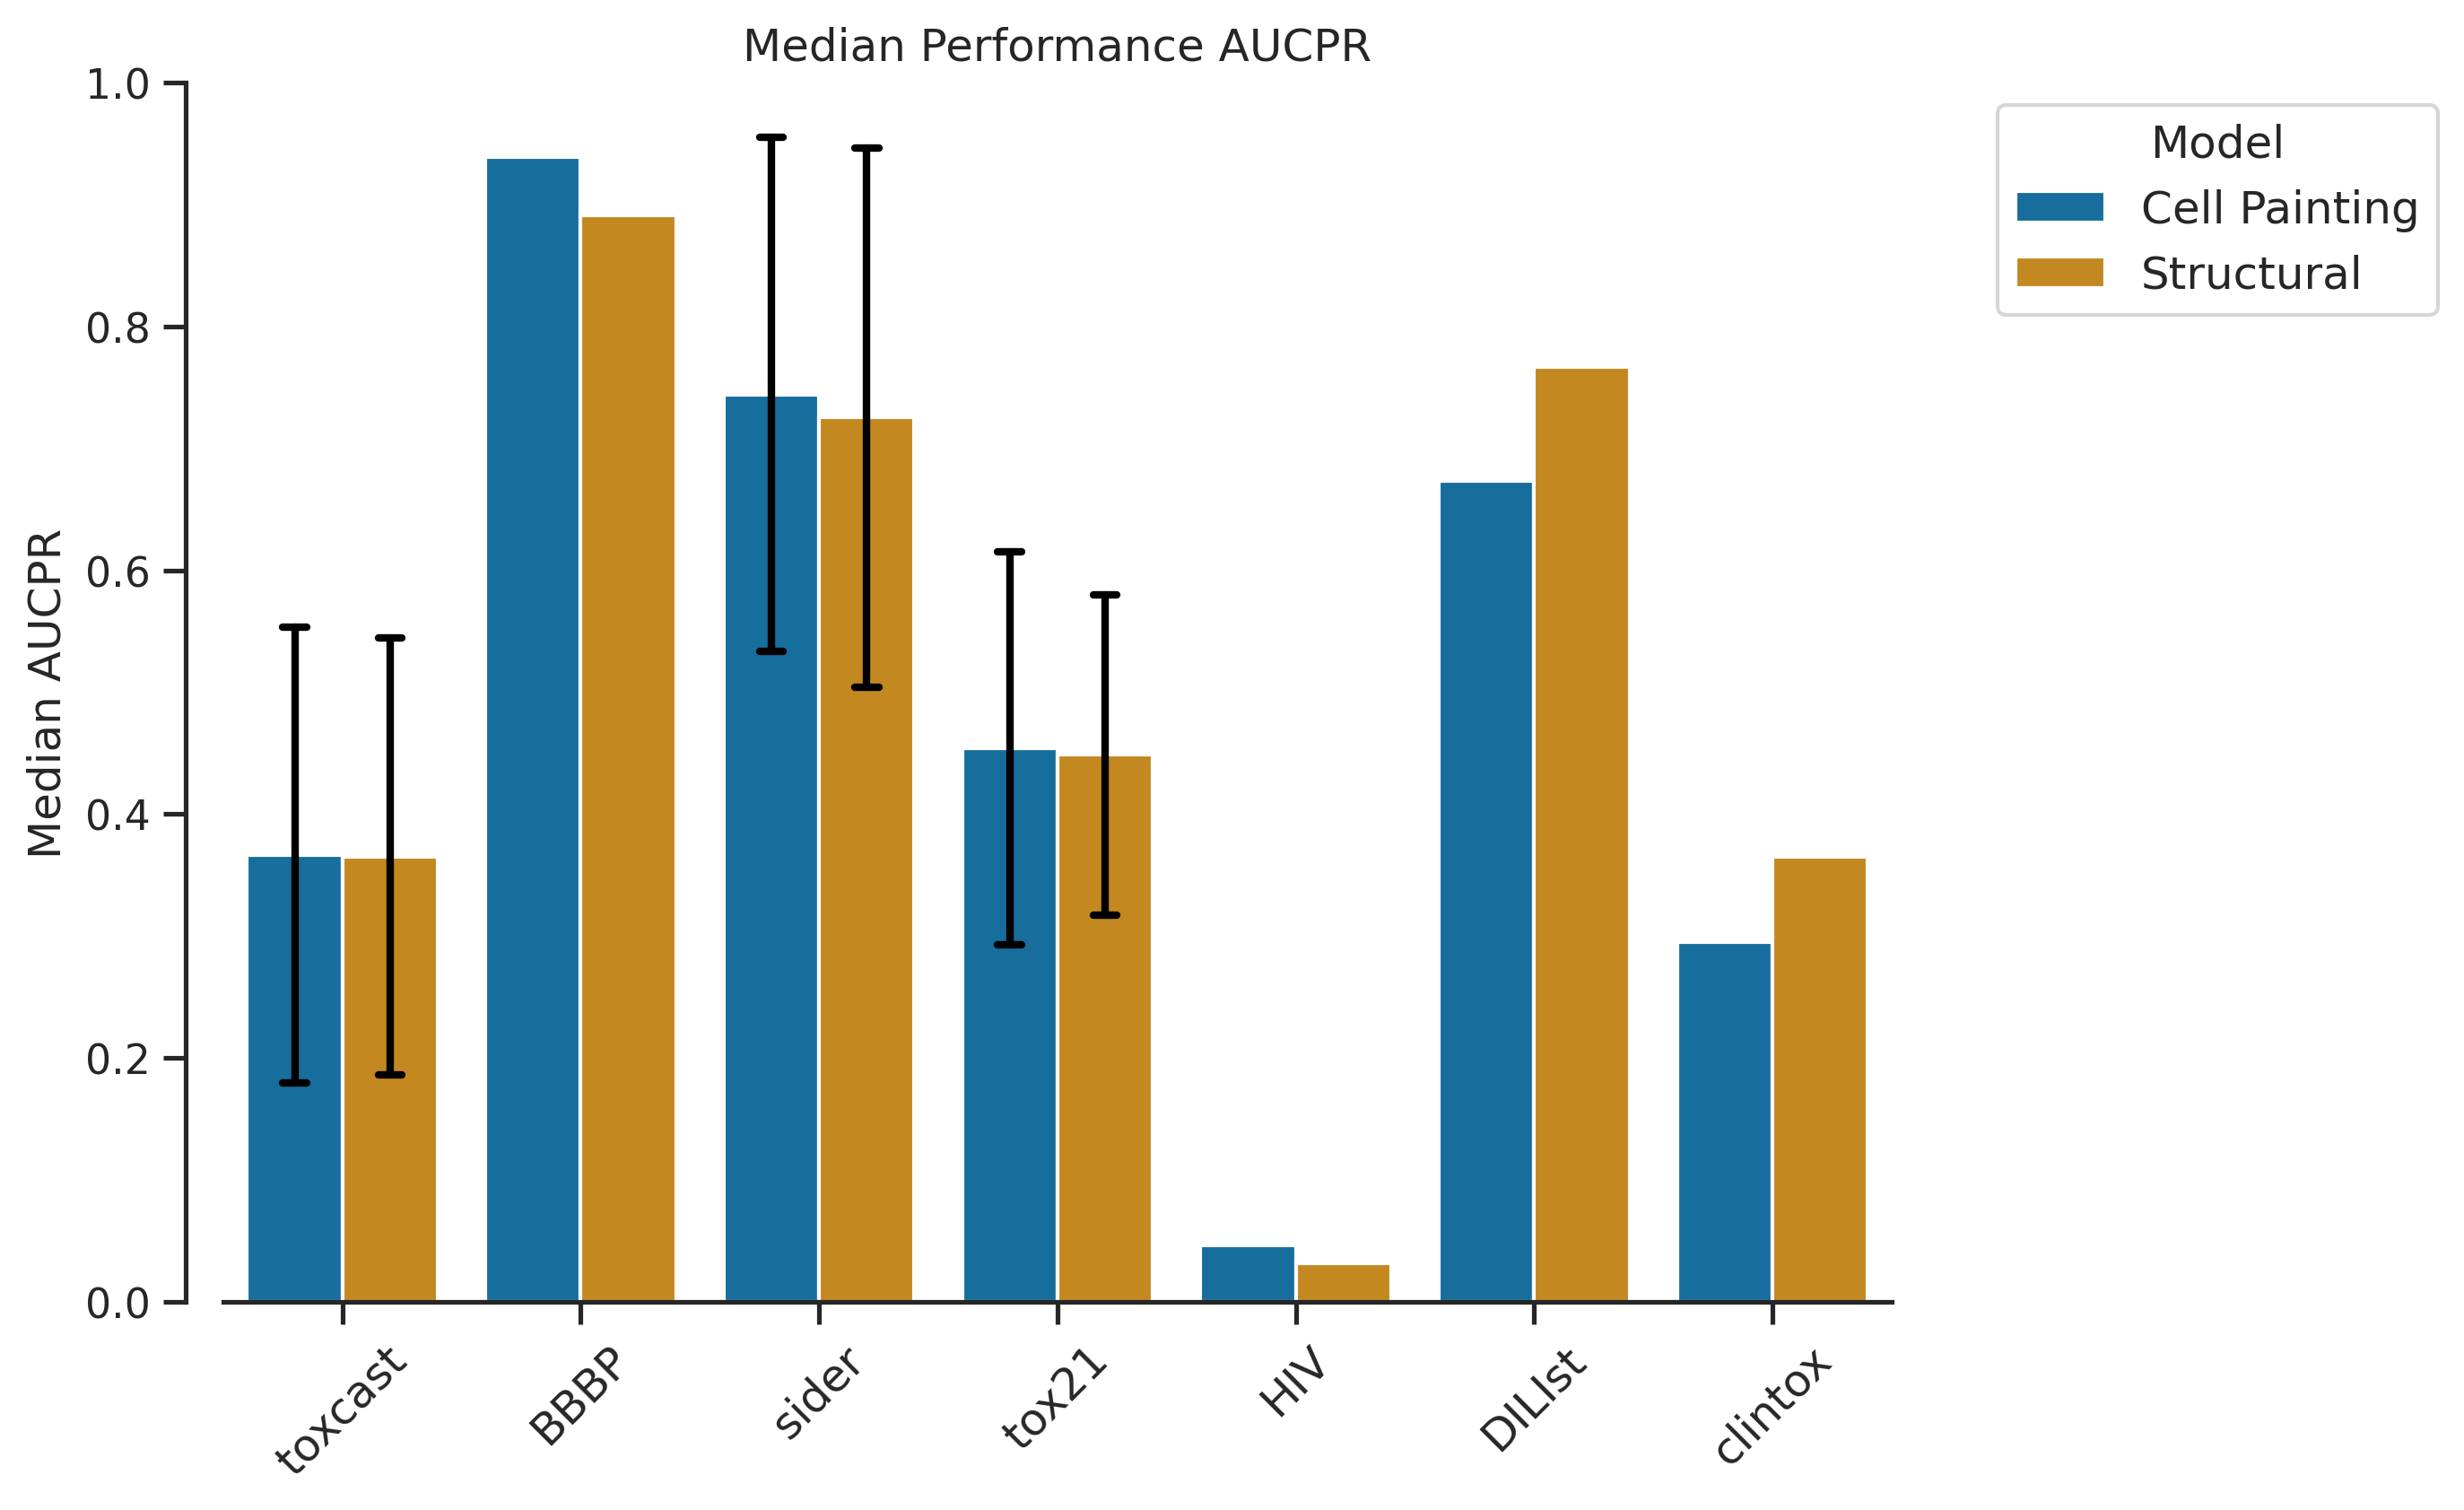

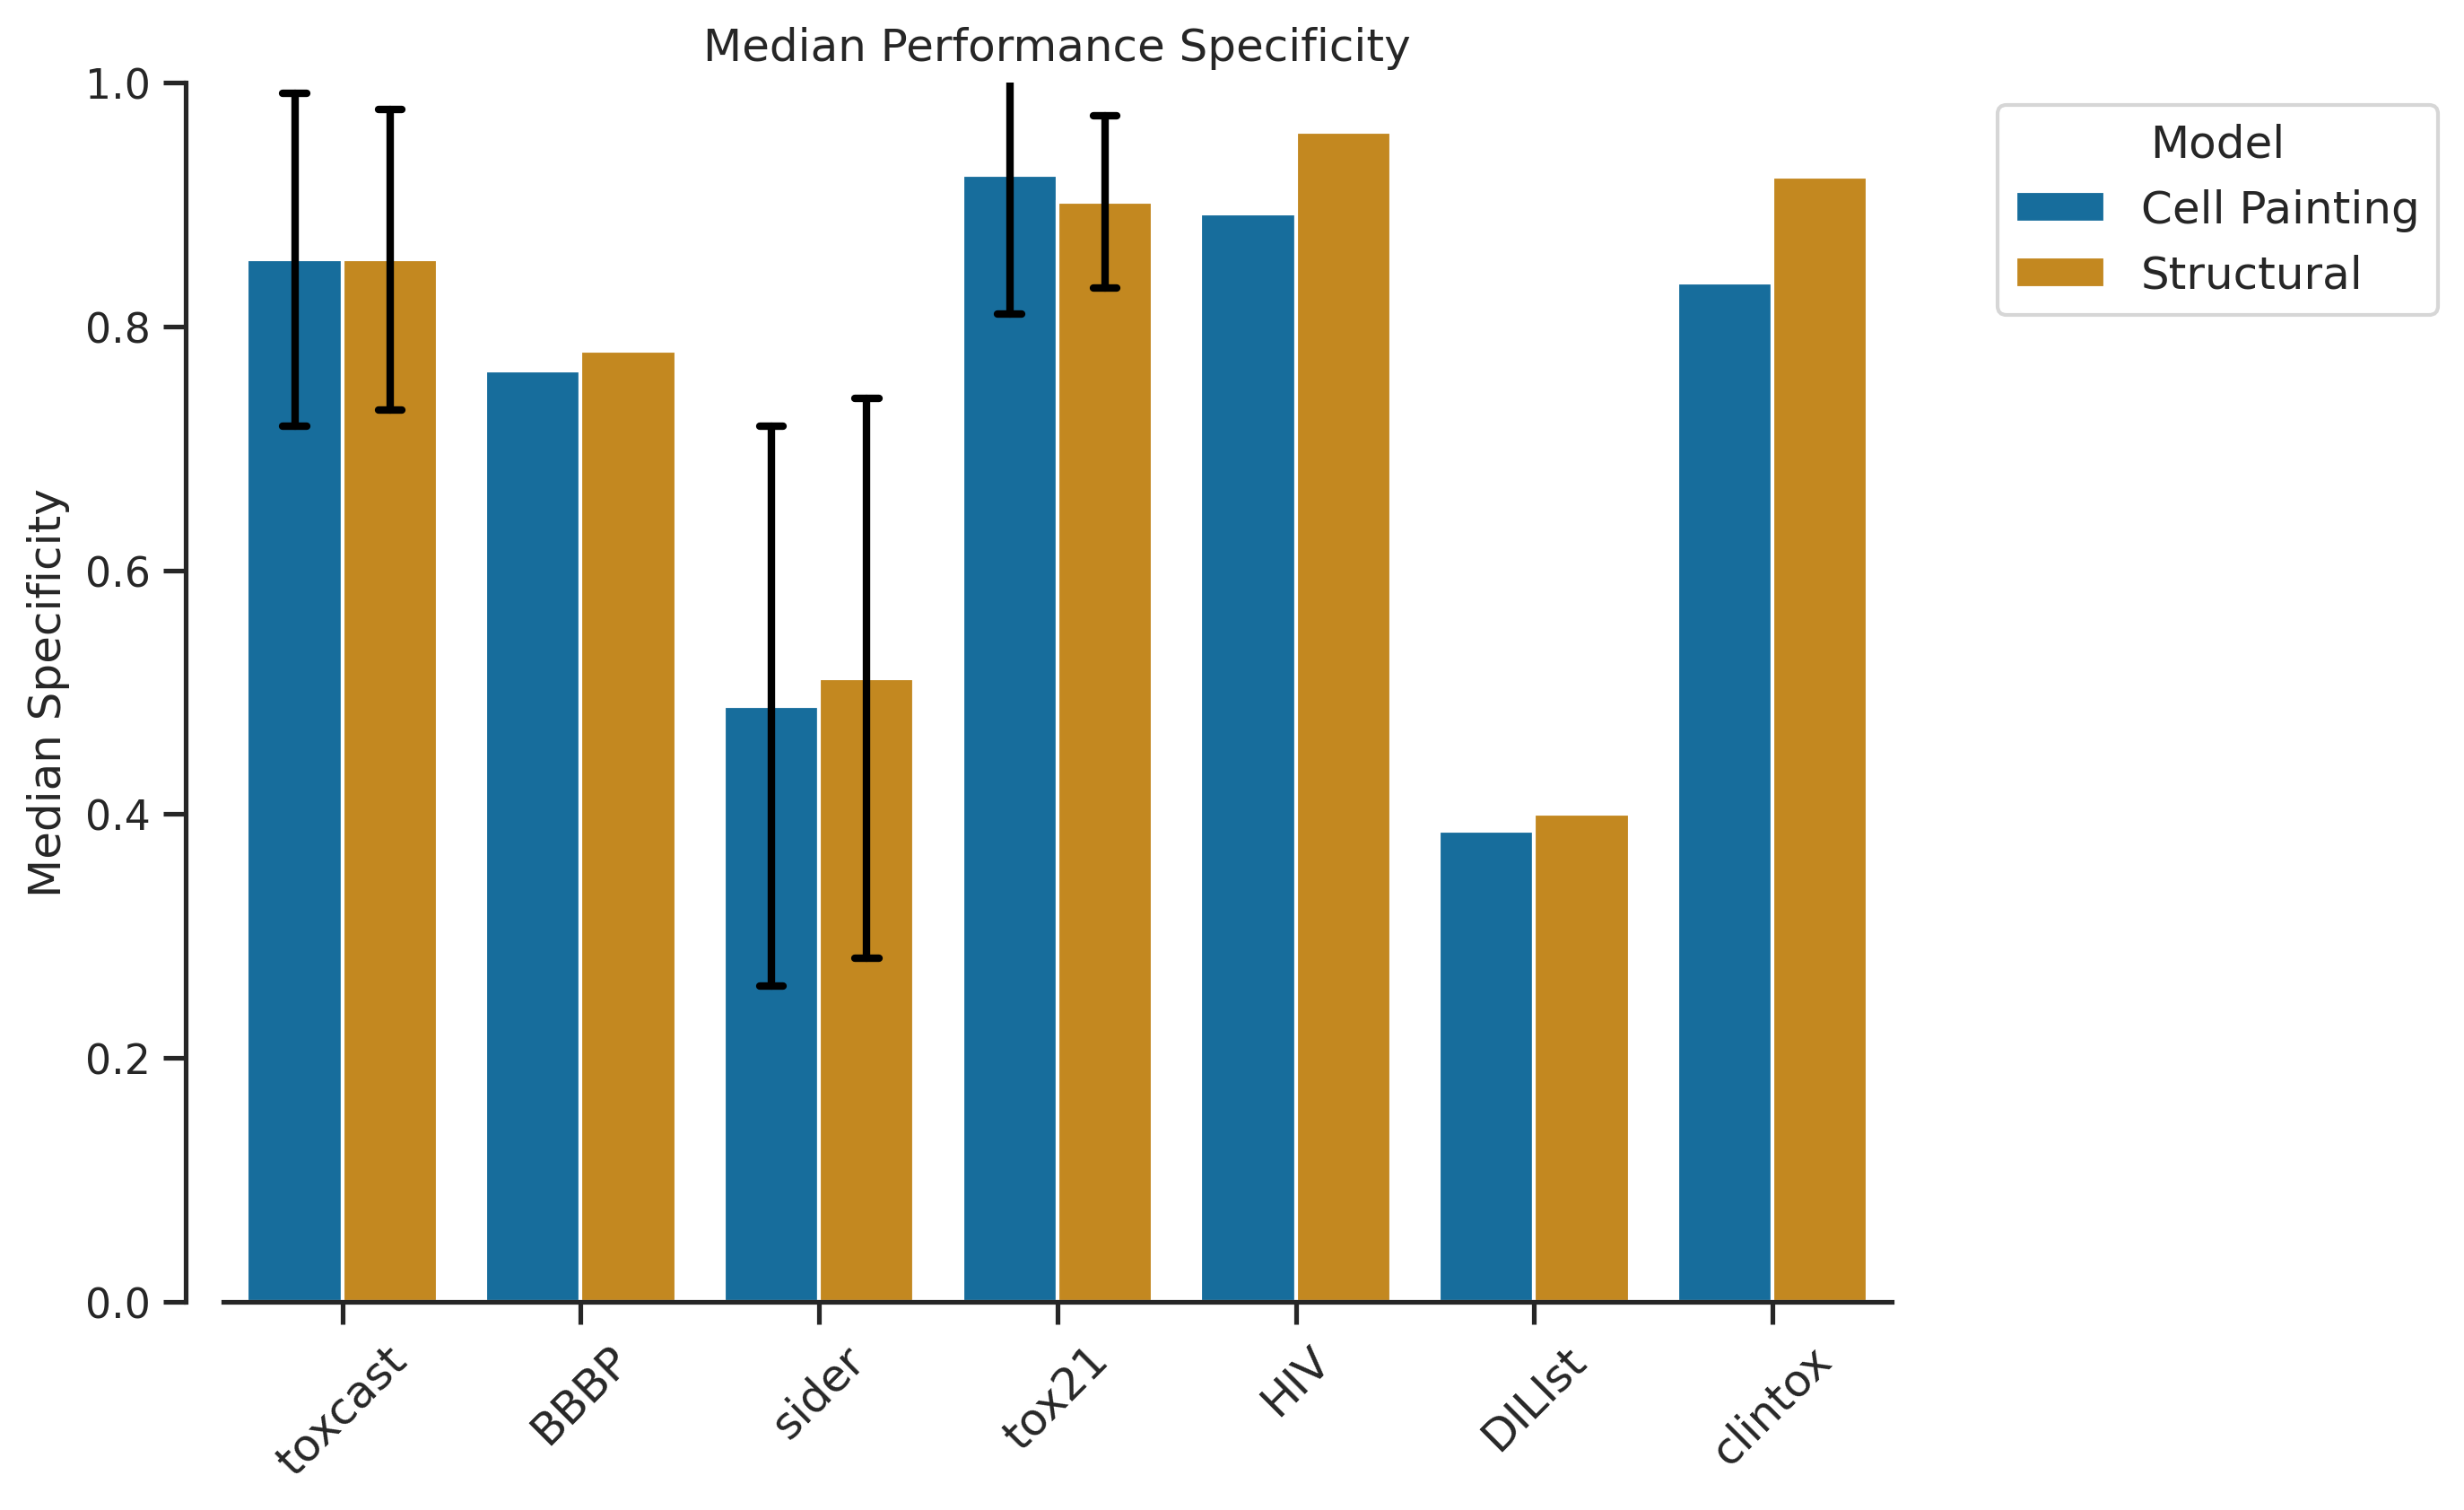

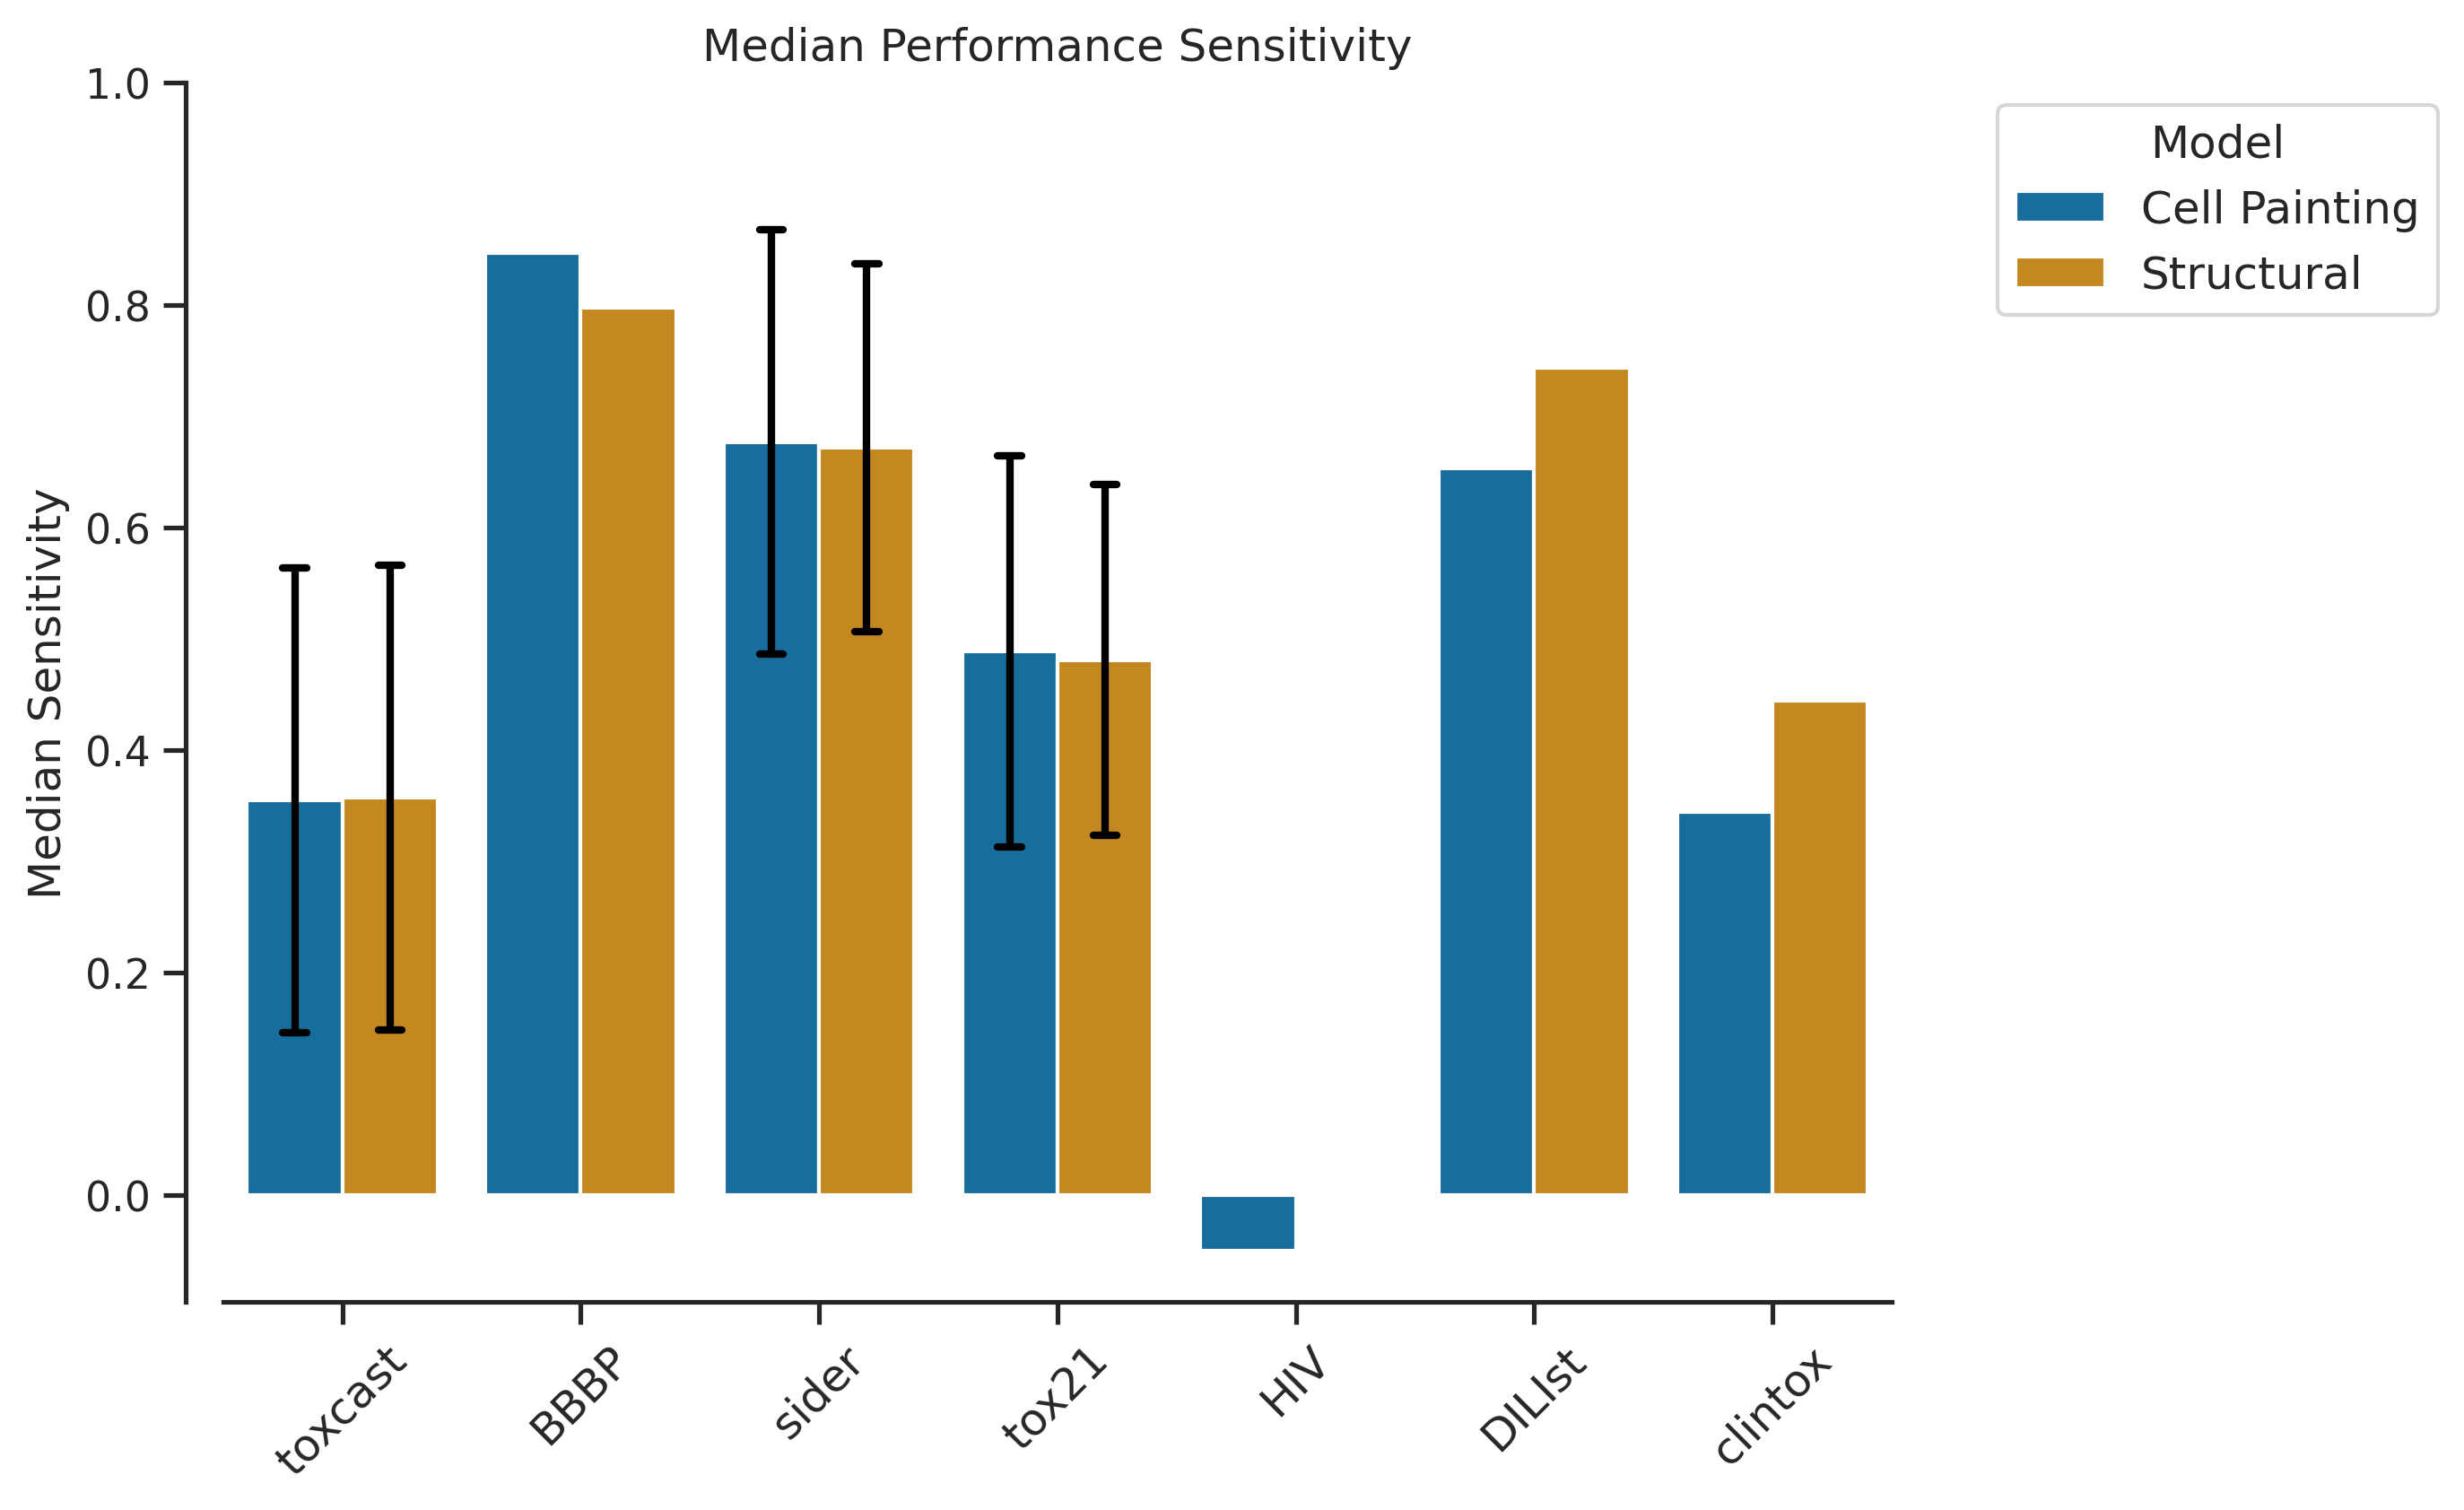

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the list of metrics to plot
metrics_to_plot = ['BA', 'AUC', 'MCC', 'AUCPR', 'Specificity', 'Sensitivity']

# Exclude the "PK_Lombardo" task
results_df = results_df[~results_df['Task'].isin(["PK_Lombardo"])]

# Set the width for grouped bars
width = 0.2

# Set a colorblind-friendly palette
colors = sns.color_palette("colorblind")

# Loop through each metric and create a grouped bar plot
for metric in metrics_to_plot:
    
    # Create a figure and axis using Seaborn
    plt.figure(figsize=(8, 6), dpi=300) 
    sns.set(style="white")  # Set the style

    metric_data = results_df[[f'img_Held_out_{metric}', 
                                      f'str_Held_out_{metric}', 'Task']]
    
    metric_data.columns = ["Cell Painting", "Structural", "Task"]

    # Melt the DataFrame to use 'hue' for differentiation
    melted_data = metric_data.reset_index().melt(id_vars='Task', 
                                            value_vars=["Cell Painting", "Structural"], 
                                            var_name='Metric', 
                                            value_name='Median Metric')
    # Create the grouped bar plot
    ax = sns.barplot(data=melted_data, x='Task', y='Median Metric', 
                hue='Metric', ci="sd", palette=colors, errcolor='black', 
                     errwidth=2, capsize=0.1) 
    

    # Set labels and title
    ax.set_ylabel(f'Median {metric}', fontsize=12)
    ax.set_title(f'Median Performance {metric}', fontsize=12)
    
    # Set x-axis ticks and labels with rotation, increased fontsize
    x_ticks = range(len(melted_data['Task'].unique()))
    x_labels = melted_data['Task'].unique()
    ax.set_xticklabels(x_labels, rotation=45, fontsize=12)  # Adjust rotation angle and fontsize

    # Add legend outside the box, on the upper right
    ax.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)

    # Remove box line, set y-axis on the left, and add a line on the x-axis
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_position(('outward', 10))
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

    # Ensure the bars sit on the x-axis
    ax.set_ylim(top=1.0)
    
    # Remove x-axis label
    ax.set_xlabel('')

    # Show the plot
    plt.savefig(f'{metric}_barplot_comparison.png', bbox_inches='tight')
    plt.show()

In [9]:
results_df

,endpoint,str_CV_AUC_mean,str_CV_AUC_std,str_Held_out_TP,str_Held_out_TN,str_Held_out_FP,str_Held_out_FN,str_Held_out_BA,str_Held_out_AUC,str_Held_out_MCC,...,img_Held_out_Sensitivity,img_CV_R2_mean,img_CV_R2_std,img_Held_out_R2,img_Held_out_RMSE,img_Held_out_median_fold_error,img_Held_out_perc_2_fold,img_Held_out_perc_3_fold,img_Held_out_perc_5_fold,Task
0,BSK_3C_VCAM1_down,0.699709,0.043135,6.0,50.0,6.0,9.0,0.646429,0.660714,0.318991,...,0.494300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,toxcast
1,TOX21_p53_BLA_p5_viability,0.743498,0.070915,6.0,456.0,14.0,17.0,0.615541,0.704533,0.247021,...,0.205726,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,toxcast
2,APR_HepG2_MicrotubuleCSK_24h_up,0.597933,0.144702,1.0,50.0,3.0,4.0,0.571698,0.811321,0.158830,...,0.164382,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,toxcast
3,BSK_CASM3C_MCSF_down,0.688836,0.106173,6.0,48.0,11.0,6.0,0.656780,0.665254,0.275369,...,0.427084,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,toxcast
4,BSK_CASM3C_TissueFactor_down,0.653295,0.114399,1.0,59.0,2.0,9.0,0.533607,0.654098,0.116226,...,0.135964,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,toxcast
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,NR-ER-LBD,0.741273,0.056736,13.0,372.0,28.0,14.0,0.705741,0.668611,0.339920,...,0.474989,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tox21
369,NR-Aromatase,0.821570,0.041475,12.0,323.0,12.0,13.0,0.722090,0.769910,0.452663,...,0.505529,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tox21
370,HIV_active,0.738914,0.129720,0.0,167.0,7.0,7.0,0.479885,0.314450,-0.040230,...,-0.050161,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HIV
371,DILIst Classification,0.611609,0.011415,84.0,26.0,39.0,29.0,0.571681,0.645882,0.149382,...,0.653553,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DILIst


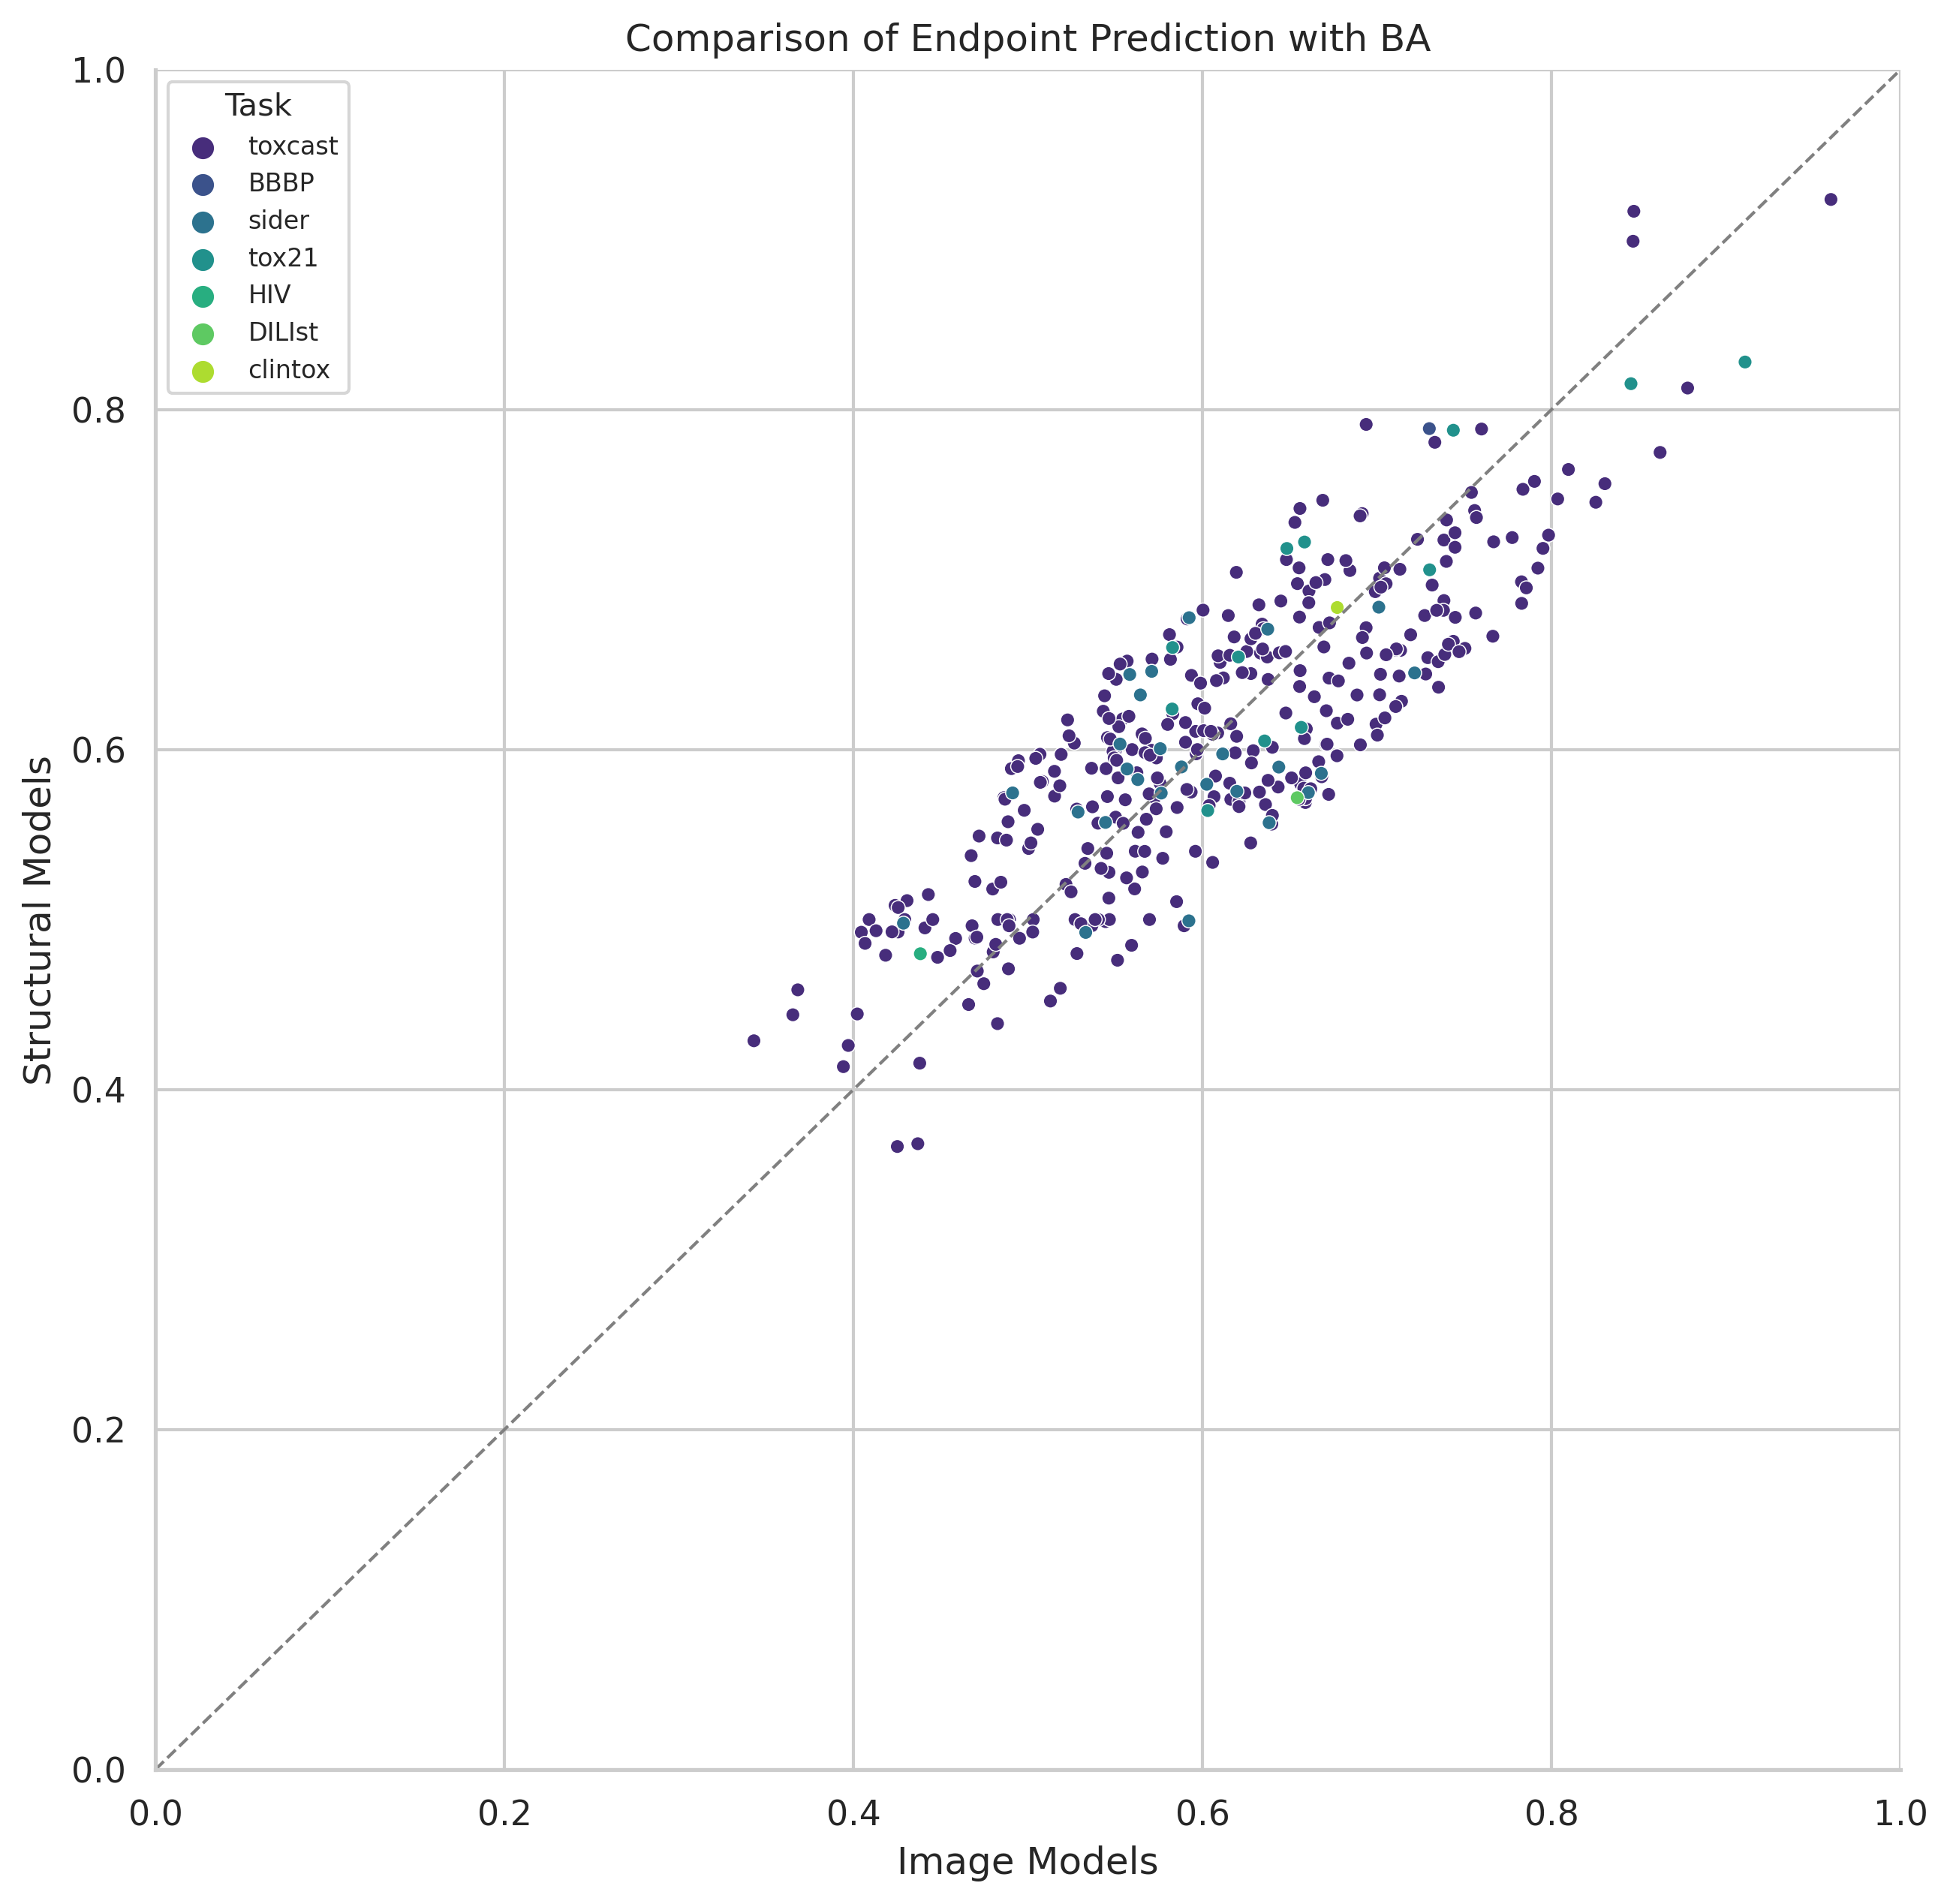

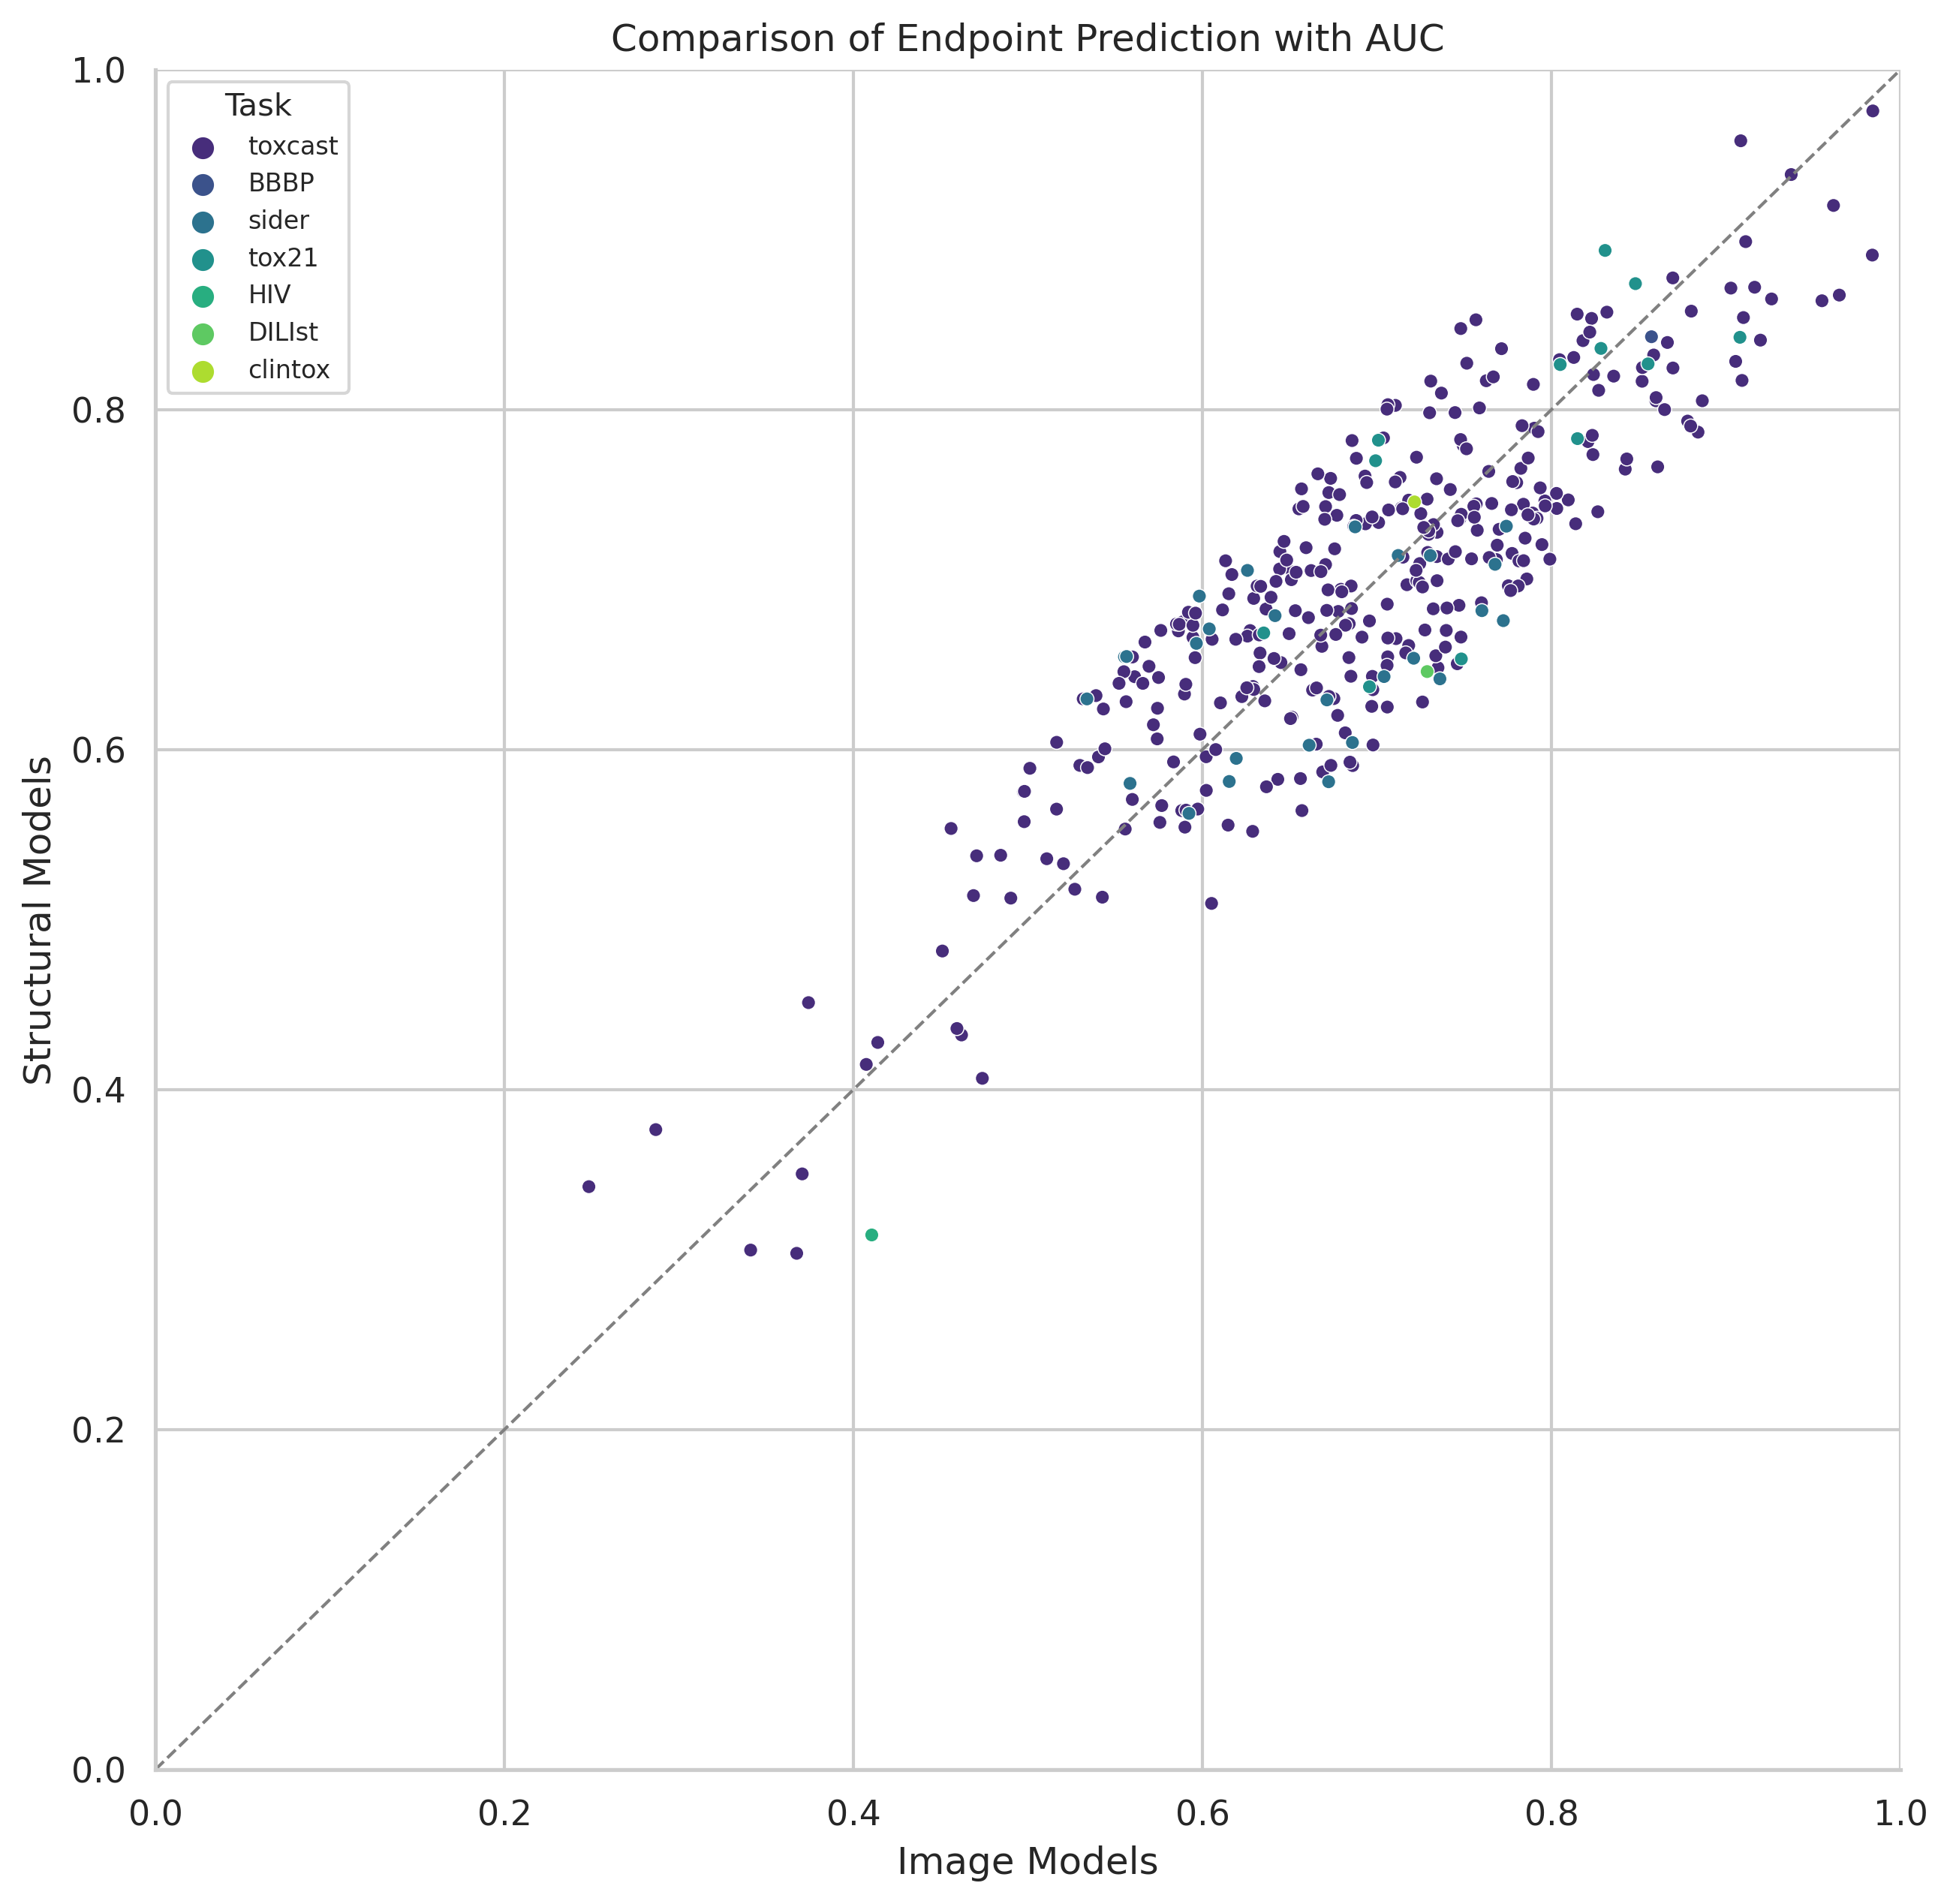

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Define the list of metrics to plot
metrics_to_plot = ['BA', 'AUC']



# Loop through each metric and create correlation plots for each
for metric in metrics_to_plot:


    # Create a correlation plot to compare endpoints in img vs. str space
    plt.figure(figsize=(10, 10), dpi=300)
    sns.set_style("whitegrid")

    # Scatterplot
    scatter = sns.scatterplot(
        data=results_df,
        x=f'img_Held_out_{metric}',
        y=f'str_Held_out_{metric}',
        hue='Task',
        s=20,
        palette='viridis',  # Adjust the color palette as desired
    )

    # Add a diagonal line (x=y)
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray', linewidth=1)

    # Set x and y axis limits to start from 0 to 1
    plt.xlim(0, 1)
    plt.ylim(0, 1)

    # Remove the box
    sns.despine()


    plt.xlabel('Image Models', fontsize=12)
    plt.ylabel('Structural Models', fontsize=12)

    plt.title(f'Comparison of Endpoint Prediction with {metric}', fontsize=12)

    plt.legend(title='Task', title_fontsize=10, fontsize=8, loc='upper left')
    
    plt.savefig(f'{metric}_scatter_comparison.png', bbox_inches='tight')  
    plt.show()

In [ ]:
#Code Snippets for more plots